<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20520863/GRU_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [ ]:
df= pd.read_csv("/content/DELL.csv")
df1=df.reset_index()['Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,21.777945,22.993132,21.693752,22.440264,21.538488,13801490
1,2017-12-04,22.504812,22.521650,20.952852,21.017401,20.172804,8513645
2,2017-12-05,20.927595,21.278399,20.644144,20.899530,20.059669,6129126
3,2017-12-06,20.767628,21.182980,20.697468,21.065109,20.218596,7828790
4,2017-12-07,21.278399,21.601139,21.205433,21.298044,20.442171,7163534
...,...,...,...,...,...,...,...
1355,2023-04-24,42.700001,42.869999,42.369999,42.680000,42.680000,2814400
1356,2023-04-25,42.599998,42.669998,41.700001,41.709999,41.709999,2396000
1357,2023-04-26,41.750000,42.189999,41.470001,41.669998,41.669998,2501400
1358,2023-04-27,41.830002,42.810001,41.790001,42.799999,42.799999,2988500


In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 122ms/step - loss: 0.0580 - val_loss: 0.0060
Epoch 2/100
14/14 [==============================] - 1s 101ms/step - loss: 0.0115 - val_loss: 0.0139
Epoch 3/100
14/14 [==============================] - 2s 111ms/step - loss: 0.0057 - val_loss: 0.0117
Epoch 4/100
14/14 [==============================] - 1s 71ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 5/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 6/100
14/14 [==============================] - 1s 69ms/step - loss: 6.1675e-04 - val_loss: 0.0021
Epoch 7/100
14/14 [==============================] - 1s 65ms/step - loss: 5.1625e-04 - val_loss: 0.0025
Epoch 8/100
14/14 [==============================] - 1s 66ms/step - loss: 5.0700e-04 - val_loss: 0.0021
Epoch 9/100
14/14 [==============================] - 1s 64ms/step - loss: 4.8986e-04 - val_loss: 0.0021
Epoch 10/100
14/14 [==============================] - 1s 65ms/step - loss: 4.7862

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 21ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 39.72461610798793
Testing RMSE: 46.62652615088619


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
n_stepss=77
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_stepss, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.6220002]
78
[0.6220002]
79
[0.6220002]
80
[0.6220002]
81
[0.6220002]
82
[0.6220002]
83
[0.6220002]
84
[0.6220002]
85
[0.6220002]
86
[0.6220002]
87
[0.6220002]
88
[0.6220002]
89
[0.6220002]
90
[0.6220002]
91
[0.6220002]
92
[0.6220002]
93
[0.6220002]
94
[0.6220002]
95
[0.6220002]
96
[0.6220002]
97
[0.6220002]
98
[0.6220002]
99
[0.6220002]
100
[0.6220002]
101
24 day input [0.60379272 0.56651277 0.54830631 0.5537249  0.55047372 0.550257
 0.53811934 0.55545881 0.57236487 0.56261139 0.56109418 0.57128118
 0.55654259 0.55004022 0.5632616  0.57648298 0.60227543 0.59837413
 0.57063088 0.59295554 0.58970434 0.59403923 0.6087778  0.62351639
 0.61549681 0.61051171 0.6087778  0.60357593 0.59078804 0.58905413
 0.59382245 0.58471926 0.57149788 0.56369508 0.55936021 0.55350811
 0.54527192 0.52966636 0.50647479 0.52316405 0.5021399  0.47873163
 0.47548046 0.49672131 0.49585431 0.50755849 0.48956881 0.51839567
 0.53140035 0.50820879 0.50257341 0.49303671 0.50625809 0.51319387
 0.53075006 0.54678913 0

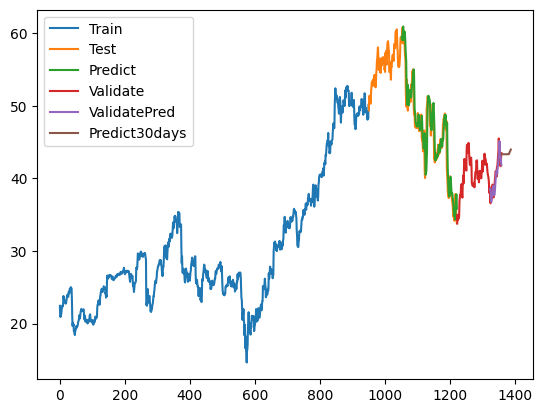

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()